In [63]:
import tensorflow as tf
import tensorflow_datasets as tfds

tf.compat.v1.disable_eager_execution()

In [64]:
tf.__version__

'2.2.0'

### Importing data as tensorflor dataset

In [65]:
mnist_tf = tfds.load(name='mnist', split='train', as_supervised=True)

In [66]:
assert isinstance(mnist_tf, tf.data.Dataset)

In [78]:
mnist_tf

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

<class 'numpy.ndarray'> <class 'numpy.int64'> 9


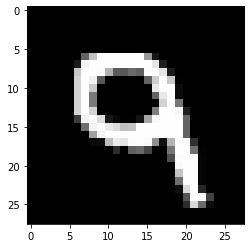

In [67]:
ds = mnist_tf.take(1)

for image, label in tfds.as_numpy(ds):
    print(type(image), type(label), label)
    plt.imshow(image, cmap="Greys_r")

### Importing data as keras dataset

<class 'numpy.ndarray'>


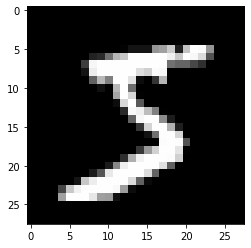

In [68]:
import matplotlib.pyplot as plt 

mnist_keras = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_keras.load_data()
print(type(train_images))

plt.imshow(train_images[0], cmap="Greys_r")

### Importing data as keras dataset

In [80]:
import tensorflow.compat.v1 as tf

In [81]:
tf.__version__

'2.2.0'

In [82]:
x = tf.placeholder(tf.float32, [None, 784])
# x = tf.compat.v1.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [74]:
y_ = tf.placeholder(tf.float32, [None, 10])
# y_ = tf.compat.v1.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# train_step = tf.compat.v1.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
# sess = tf.compat.v1.InteractiveSession()


In [75]:
# tf.global_variables_initializer().run()
tf.compat.v1.global_variables_initializer().run()


In [22]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [79]:
sess.run?

In [23]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))


In [24]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [25]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.9202
